# Download Dataset
Run `script/download_dataset.sh` in project root directory(`/project`)

# Load Libraries

In [1]:
from os.path import abspath, join, dirname
import re
import json

import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', None)

# 1. Get File Path

In [3]:
class PATH:
    root = '/project'
    data = join(root, 'data')
    
    family        = join(data, "familyxx", "familyxx")
    household     = join(data, "househld", "househld")
    person        = join(data, "personsx", "personsx")
    sample_child  = join(data, "samchild", "samchild")
    sample_adult  = join(data, "samadult", "samadult")

In [4]:
data_id = ['family', 'household', 'person', 'sample_child', 'sample_adult'][0]

In [5]:
src_path     = getattr(PATH, data_id)
summary_path = f"{src_path}_summary.pdf"
layout_path  = f"{src_path}_layout.pdf"
output_path  = f"{src_path}_meta.csv"

# 2. Parse Summary PDF

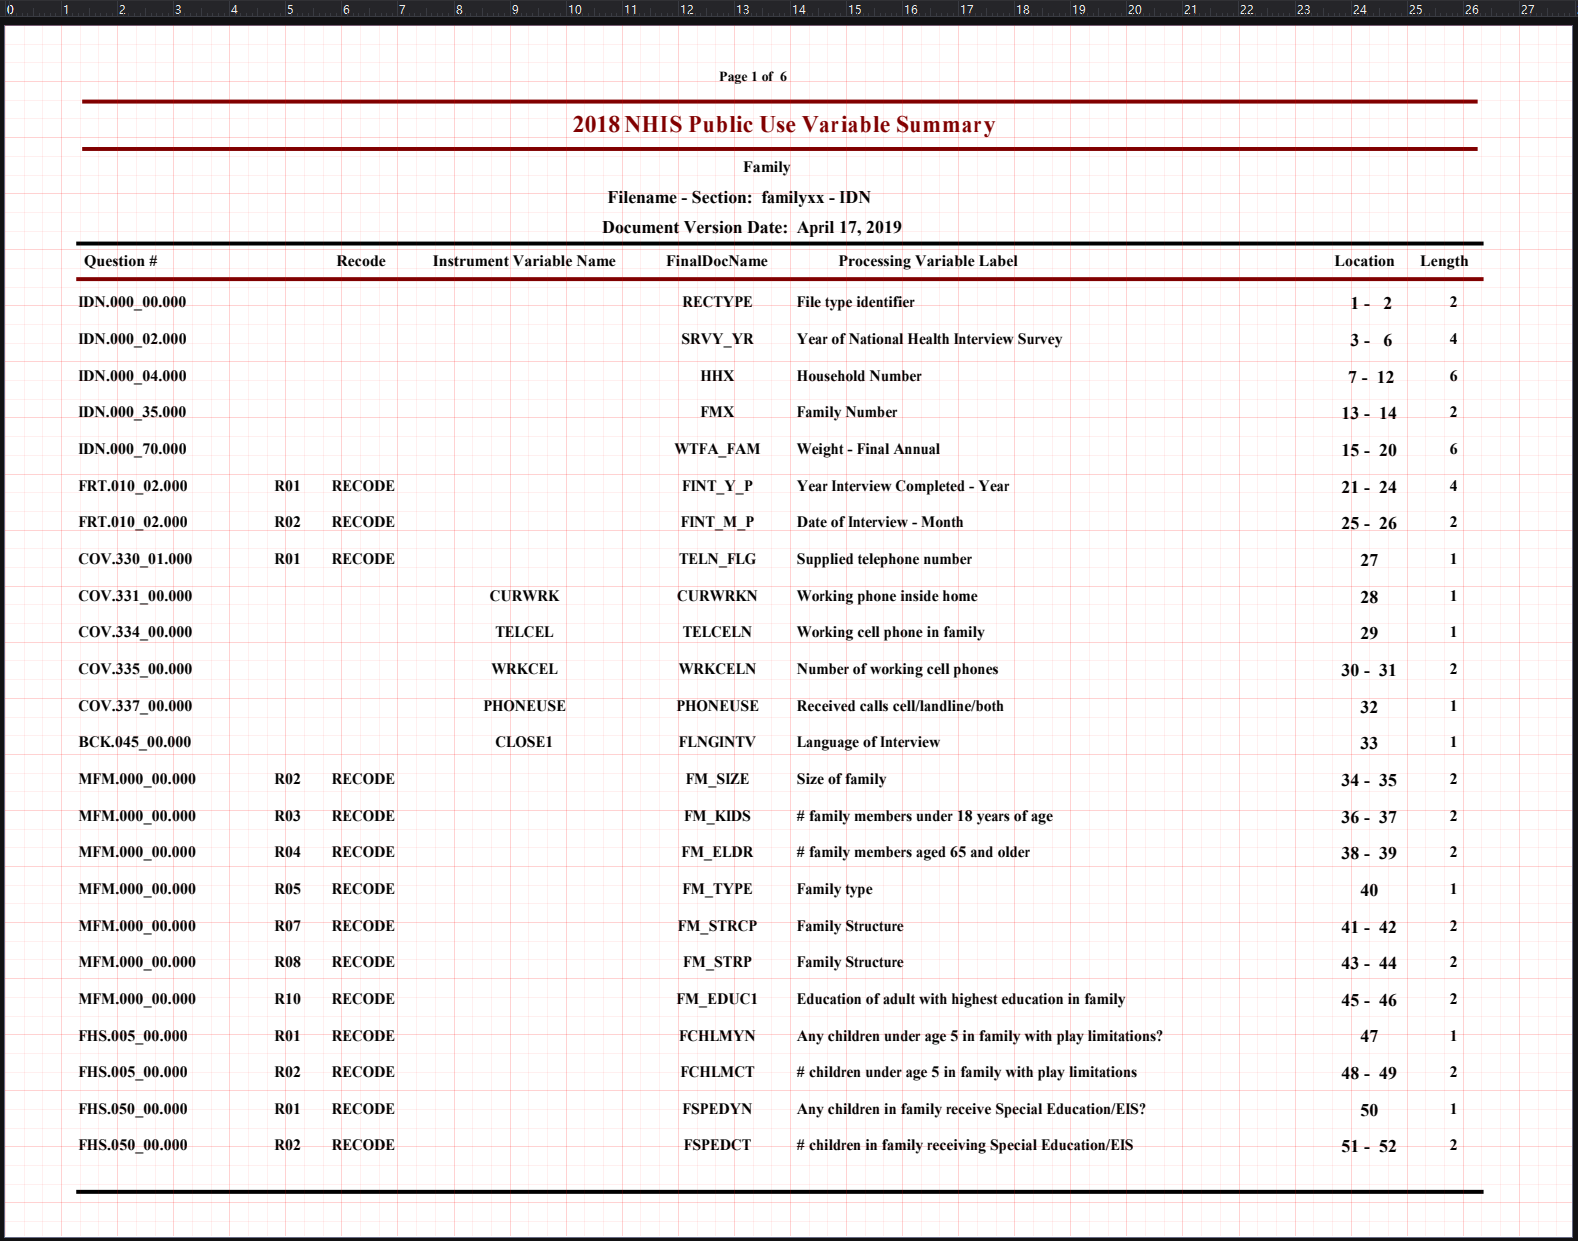

## 2.1 Read PDF

In [6]:
from tabula import read_pdf

columns   = [93, 126, 150, 200, 320, 390, 660, 703]  # point
raw_datas = read_pdf(summary_path, columns=columns, guess=False, pages='all', silent=True)

`raw_datas[i]`: `i`'th page

In [7]:
raw_datas[0]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Page 1 of,6,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,2018 N,HIS Public Us,e Var iable Summary,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,Fami,ly,NaN,NaN
2,NaN,NaN,NaN,NaN,Filen,ame - Section: fam,ilyxx - IDN,NaN,NaN
3,NaN,NaN,NaN,NaN,Docu,ment Version Date,": April 17, 2019",NaN,NaN
4,Question #,NaN,NaN,Recode,Instrument Variable Name,FinalDocName,Processing Variable Label,Location,Length
5,IDN.000_00.000,NaN,NaN,NaN,NaN,RECTYPE,File type identifier,1 -2,2
6,IDN.000_02.000,NaN,NaN,NaN,NaN,SRVY_YR,Year of National Health Interview Survey,3 -6,4
7,IDN.000_04.000,NaN,NaN,NaN,NaN,HHX,Household Number,7 - 12,6
8,IDN.000_35.000,NaN,NaN,NaN,NaN,FMX,Family Number,13 - 14,2
9,IDN.000_70.000,NaN,NaN,NaN,NaN,WTFA_FAM,Weight - Final Annual,15 - 20,6


## 2.2 Processing

### 2.2.1 Drop head contents for each page and concatenate

In [8]:
datas = [pd.DataFrame(data.loc[5:]).rename(columns=data.loc[4]) for data in raw_datas]
data  = pd.concat(datas, ignore_index=True)

In [9]:
data.head(24)

,Question #,NaN,NaN,Recode,Instrument Variable Name,FinalDocName,Processing Variable Label,Location,Length
0,IDN.000_00.000,NaN,NaN,NaN,NaN,RECTYPE,File type identifier,1 -2,2
1,IDN.000_02.000,NaN,NaN,NaN,NaN,SRVY_YR,Year of National Health Interview Survey,3 -6,4
2,IDN.000_04.000,NaN,NaN,NaN,NaN,HHX,Household Number,7 - 12,6
3,IDN.000_35.000,NaN,NaN,NaN,NaN,FMX,Family Number,13 - 14,2
4,IDN.000_70.000,NaN,NaN,NaN,NaN,WTFA_FAM,Weight - Final Annual,15 - 20,6
5,FRT.010_02.000,NaN,R01,RECODE,NaN,FINT_Y_P,Year Interview Completed - Year,21 - 24,4
6,FRT.010_02.000,NaN,R02,RECODE,NaN,FINT_M_P,Date of Interview - Month,25 - 26,2
7,COV.330_01.000,NaN,R01,RECODE,NaN,TELN_FLG,Supplied telephone number,27,1
8,COV.331_00.000,NaN,NaN,NaN,CURWRK,CURWRKN,Working phone inside home,28,1
9,COV.334_00.000,NaN,NaN,NaN,TELCEL,TELCELN,Working cell phone in family,29,1


### 2.2.2 Handle the appended rows

In [10]:
def sanity_check_for_summary_data(data):
    try:
        # Columns below should not contain space
        for col in ['FinalDocName']:
            assert len(data[data[col].str.contains(' ')]) == 0

        # Columns below should start with number
        for col in ('Location', 'Length'):
            assert len(data[~data[col].str.contains("^[0-9]", regex=True)]) == 0
    except Exception as e:
        display(data)
        print(e)

In [11]:
def process_summary_data(data):
    # 1. Handle the appended rows
    # Find the appended row
    idxs_app = data[data['Question #'].isna() & data['FinalDocName'].isna()].index

    # Concatenate values
    for idx in reversed(idxs_app):
        dict_app = data.loc[idx].dropna().to_dict()
        for key, value in dict_app.items():
            data.loc[idx-1, key] += f" {value}"

    # Remove appended rows
    data = data.drop(idxs_app).reset_index(drop=True)

    # 2. Remove space in location
    data['Location'] = data['Location'].str.replace(' ', '')

    # 3. Drop the last row
    data = data[:-1]

    sanity_check_for_summary_data(data)
    return data

In [12]:
summary_data = process_summary_data(data)

In [13]:
summary_data.head(100)

,Question #,NaN,NaN,Recode,Instrument Variable Name,FinalDocName,Processing Variable Label,Location,Length
0,IDN.000_00.000,NaN,NaN,NaN,NaN,RECTYPE,File type identifier,1-2,2
1,IDN.000_02.000,NaN,NaN,NaN,NaN,SRVY_YR,Year of National Health Interview Survey,3-6,4
2,IDN.000_04.000,NaN,NaN,NaN,NaN,HHX,Household Number,7-12,6
3,IDN.000_35.000,NaN,NaN,NaN,NaN,FMX,Family Number,13-14,2
4,IDN.000_70.000,NaN,NaN,NaN,NaN,WTFA_FAM,Weight - Final Annual,15-20,6
5,FRT.010_02.000,NaN,R01,RECODE,NaN,FINT_Y_P,Year Interview Completed - Year,21-24,4
6,FRT.010_02.000,NaN,R02,RECODE,NaN,FINT_M_P,Date of Interview - Month,25-26,2
7,COV.330_01.000,NaN,R01,RECODE,NaN,TELN_FLG,Supplied telephone number,27,1
8,COV.331_00.000,NaN,NaN,NaN,CURWRK,CURWRKN,Working phone inside home,28,1
9,COV.334_00.000,NaN,NaN,NaN,TELCEL,TELCELN,Working cell phone in family,29,1


# 3. Parse Layout PDF

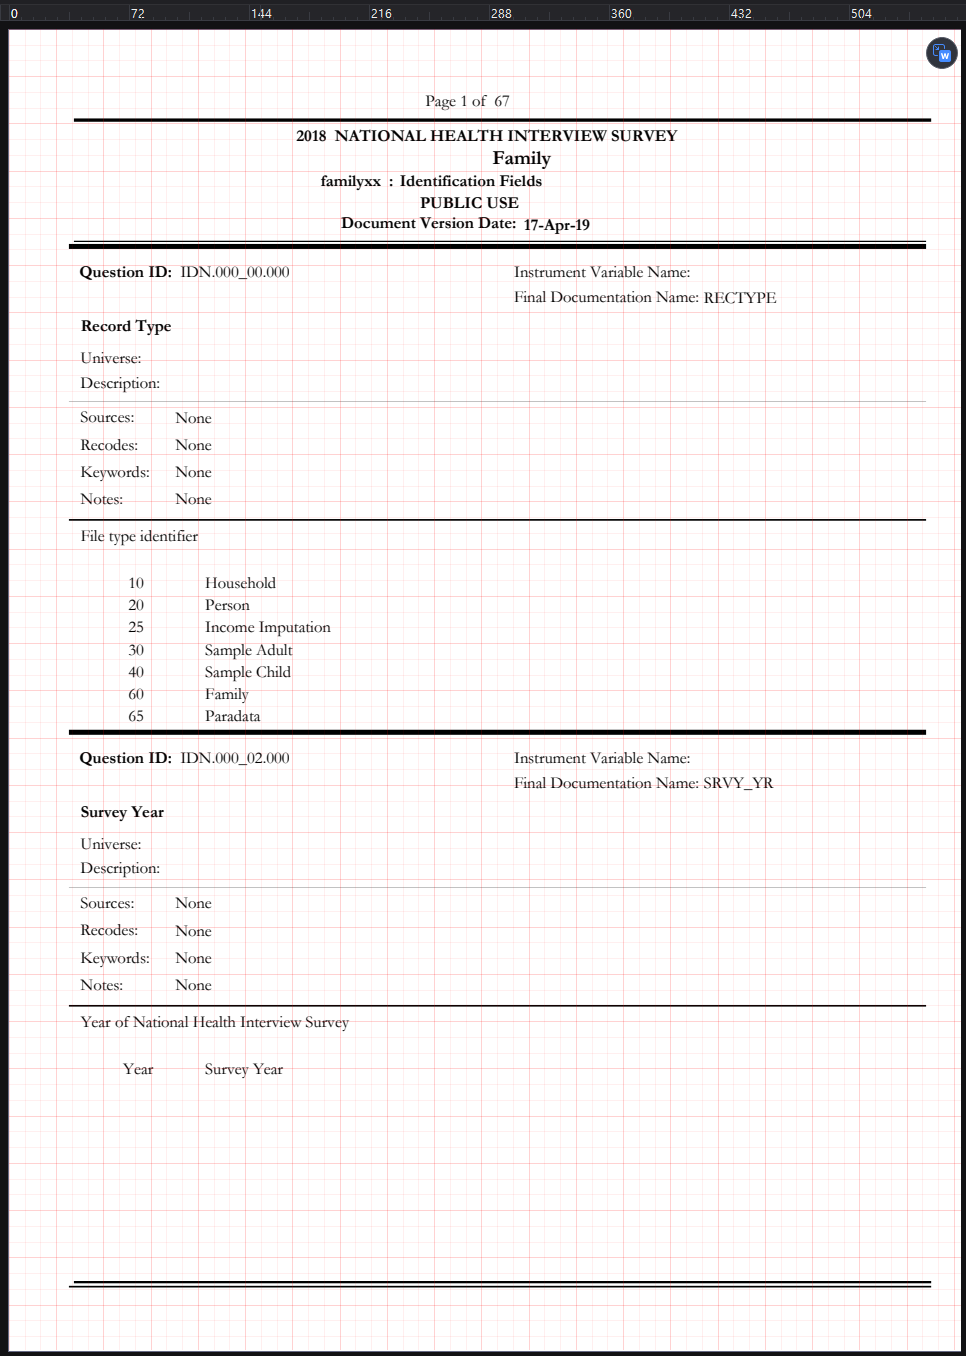

## 3.1 Read PDF

In [14]:
from tabula import read_pdf

columns = [115]  # point
raw_datas = read_pdf(layout_path, columns=columns, guess=False, pages='all', silent=True)

`raw_datas[i]`: `i`'th page

In [15]:
raw_datas[0]

,Unnamed: 0,Page 1 of 67
0,NaN,2018 NATIONAL HEALTH INTERVIEW SURVEY
1,NaN,Family
2,NaN,familyxx : Identification Fields
3,NaN,PUBLIC USE
4,NaN,Document Version Date: 17-Apr-19
5,Question ID: IDN,.000_00.000 Instrument Variable Name:
6,NaN,Final Documentation Name: RECTYPE
7,Record Type,NaN
8,Universe:,NaN
9,Description:,NaN


## 3.2 Processing

### 3.2.1 Split options

In [16]:
def convert_to_layout_options_data(raw_data, summary_data):
    # 1. Preparation
    raw_data.columns = ['key', 'value']
    idxs_sep = raw_data[raw_data.iloc[:, 0].fillna('').str.contains('Question ID')].index
    
    # 2. Fill options data
    df_options = pd.DataFrame(columns=['FinalDocName', 'Options'])
    for it in range(len(idxs_sep)):
        # Select current question id(or final documentation name)
        if it < len(idxs_sep) - 1:
            cur_data = raw_data[idxs_sep[it]:idxs_sep[it + 1]]
        else:
            cur_data = raw_data[idxs_sep[it]:]
        final_doc_name = raw_data.loc[idxs_sep[it] + 1]['value'].split(': ')[1]

        options = {}
        for idx in reversed(cur_data.index):
            # Select valid options checked by the length
            row = cur_data.loc[idx]
            length = int(summary_data[summary_data['FinalDocName'] == final_doc_name]['Length'].item())
            if re.search(r"^[0-9]{0,%d}([-]*[0-9]{%d})*$" % (length, length), str(row['key'])):  # row['key'] can be nan(float)
                options[row['key']] = row['value']
            else:
                break
        df_options = pd.concat([
            df_options,
            pd.DataFrame({'FinalDocName': [final_doc_name], 'Options': json.dumps(options) if options else None})
        ], ignore_index=True)
    return df_options

In [17]:
option_data = pd.concat([convert_to_layout_options_data(raw_data, summary_data) for raw_data in raw_datas], ignore_index=True)

In [18]:
option_data.head(10)

,FinalDocName,Options
0,RECTYPE,"{""65"": ""Paradata"", ""60"": ""Family"", ""40"": ""Sample Child"", ""30"": ""Sample Adult"", ""25"": ""Income Imputation"", ""20"": ""Person"", ""10"": ""Household""}"
1,SRVY_YR,None
2,HHX,None
3,FMX,"{""01-25"": ""Family number 1 - 25""}"
4,WTFA_FAM,None
5,FINT_Y_P,"{""9998"": ""Not ascertained""}"
6,FINT_M_P,"{""98"": ""Not ascertained"", ""12"": ""December"", ""11"": ""November"", ""10"": ""October"", ""09"": ""September"", ""08"": ""August"", ""07"": ""July"", ""06"": ""June"", ""05"": ""May"", ""04"": ""April"", ""03"": ""March"", ""02"": ""February"", ""01"": ""January""}"
7,TELN_FLG,"{""9"": ""Don't know"", ""8"": ""Not ascertained"", ""7"": ""Refused"", ""2"": ""No telephone"", ""1"": ""Gave telephone number""}"
8,CURWRKN,"{""9"": ""Don't know"", ""8"": ""Not ascertained"", ""7"": ""Refused"", ""2"": ""No"", ""1"": ""Yes""}"
9,TELCELN,"{""9"": ""Don't know"", ""8"": ""Not ascertained"", ""7"": ""Refused"", ""2"": ""No"", ""1"": ""Yes""}"


### 3.2.2 Split Keywords

In [19]:
columns   = [97]
raw_datas = read_pdf(layout_path, columns=columns, guess=False, pages='all', silent=True)

In [20]:
raw_datas[0]

,Unnamed: 0,Page 1 of 67
0,NaN,2018 NATIONAL HEALTH INTERVIEW SURVEY
1,NaN,Family
2,NaN,familyxx : Identification Fields
3,NaN,PUBLIC USE
4,NaN,Document Version Date: 17-Apr-19
5,Question ID:,IDN.000_00.000 Instrument Variable Name:
6,NaN,Final Documentation Name: RECTYPE
7,Record Type,NaN
8,Universe:,NaN
9,Description:,NaN


In [21]:
def convert_layout_keywords_data(raw_data):
    # 1. Preparation
    raw_data.columns = ['key', 'value']
    idxs_sep = raw_data[raw_data.iloc[:, 0].fillna('').str.contains('Question ID')].index

    # 2. Fill keywords data
    df_keywords = pd.DataFrame(columns=['FinalDocName', 'Keywords'])
    for it in range(len(idxs_sep)):
        # Select current question id(or final documentation name)
        if it < len(idxs_sep) - 1:
            table = raw_data[idxs_sep[it]:idxs_sep[it + 1]]
        else:
            table = raw_data[idxs_sep[it]:]
        final_documentation_name = raw_data.loc[idxs_sep[it] + 1]['value'].split(': ')[1]

        # Select keywords
        value = table[table['key'] == 'Keywords:']['value'].item()
        if value == 'None':
            value = None
        else:
            value = [s.lower() for s in value.split('; ')]

        df_keywords = pd.concat([
            df_keywords,
            pd.DataFrame({'FinalDocName': [final_documentation_name], 'Keywords': json.dumps(value) if value else None})
        ], ignore_index=True)
    return df_keywords

In [22]:
keyword_data = pd.concat([convert_layout_keywords_data(raw_data) for raw_data in raw_datas], ignore_index=True)

In [23]:
keyword_data.head(10)

,FinalDocName,Keywords
0,RECTYPE,None
1,SRVY_YR,None
2,HHX,"[""household number""]"
3,FMX,"[""family number""]"
4,WTFA_FAM,None
5,FINT_Y_P,"[""interview year""]"
6,FINT_M_P,"[""interview month""]"
7,TELN_FLG,"[""telephone number"", ""working telephone""]"
8,CURWRKN,"[""telephone number"", ""working telephone""]"
9,TELCELN,"[""working cell phone"", ""cellular telephone""]"


### 3.2.3 Join layout data

In [24]:
layout_data = option_data.join(keyword_data, rsuffix='_').drop(columns='FinalDocName_')

In [25]:
layout_data.head(10)

,FinalDocName,Options,Keywords
0,RECTYPE,"{""65"": ""Paradata"", ""60"": ""Family"", ""40"": ""Sample Child"", ""30"": ""Sample Adult"", ""25"": ""Income Imputation"", ""20"": ""Person"", ""10"": ""Household""}",None
1,SRVY_YR,None,None
2,HHX,None,"[""household number""]"
3,FMX,"{""01-25"": ""Family number 1 - 25""}","[""family number""]"
4,WTFA_FAM,None,None
5,FINT_Y_P,"{""9998"": ""Not ascertained""}","[""interview year""]"
6,FINT_M_P,"{""98"": ""Not ascertained"", ""12"": ""December"", ""11"": ""November"", ""10"": ""October"", ""09"": ""September"", ""08"": ""August"", ""07"": ""July"", ""06"": ""June"", ""05"": ""May"", ""04"": ""April"", ""03"": ""March"", ""02"": ""February"", ""01"": ""January""}","[""interview month""]"
7,TELN_FLG,"{""9"": ""Don't know"", ""8"": ""Not ascertained"", ""7"": ""Refused"", ""2"": ""No telephone"", ""1"": ""Gave telephone number""}","[""telephone number"", ""working telephone""]"
8,CURWRKN,"{""9"": ""Don't know"", ""8"": ""Not ascertained"", ""7"": ""Refused"", ""2"": ""No"", ""1"": ""Yes""}","[""telephone number"", ""working telephone""]"
9,TELCELN,"{""9"": ""Don't know"", ""8"": ""Not ascertained"", ""7"": ""Refused"", ""2"": ""No"", ""1"": ""Yes""}","[""working cell phone"", ""cellular telephone""]"


# 4. Merge Summary and Layout Data

In [26]:
def merge_summary_layout_data(summary_data, layout_data):
    # 1. Join summary data and layout data
    data = summary_data.join(layout_data, rsuffix='_').drop(columns='FinalDocName_')

    # 2. Change nan to None
    data.replace(np.nan, None, inplace=True)

    # 3. Change dtypes to string
    for col in data:
        data[col] = data[col].astype(str)

    # 4. Strip, lower all columns
    for col in data:
        data[col] = data[col].str.strip()
        if col not in ('Question #', 'FinalDocName'):
            data[col] = data[col].str.lower()

    # 5. Change none to None
    data.replace('none', None, inplace=True)

    # 6. Rename columns
    data.rename(columns={
        'Question #': 'question_id',
        'Recode': 'recode',
        'Instrument Variable Name': 'inst_id',
        'FinalDocName': 'final_id',
        'Processing Variable Label': 'description',
        'Location': 'location',
        'Length': 'value_length',
        'Options': 'options',
        'Keywords': 'keywords'
    }, inplace=True)

    return data

In [27]:
final_data = merge_summary_layout_data(summary_data, layout_data)

In [28]:
final_data.head(10)

,question_id,NaN,NaN,recode,inst_id,final_id,description,location,value_length,options,keywords
0,IDN.000_00.000,None,None,None,None,RECTYPE,file type identifier,1-2,2,"{""65"": ""paradata"", ""60"": ""family"", ""40"": ""sample child"", ""30"": ""sample adult"", ""25"": ""income imputation"", ""20"": ""person"", ""10"": ""household""}",None
1,IDN.000_02.000,None,None,None,None,SRVY_YR,year of national health interview survey,3-6,4,None,None
2,IDN.000_04.000,None,None,None,None,HHX,household number,7-12,6,None,"[""household number""]"
3,IDN.000_35.000,None,None,None,None,FMX,family number,13-14,2,"{""01-25"": ""family number 1 - 25""}","[""family number""]"
4,IDN.000_70.000,None,None,None,None,WTFA_FAM,weight - final annual,15-20,6,None,None
5,FRT.010_02.000,None,r01,recode,None,FINT_Y_P,year interview completed - year,21-24,4,"{""9998"": ""not ascertained""}","[""interview year""]"
6,FRT.010_02.000,None,r02,recode,None,FINT_M_P,date of interview - month,25-26,2,"{""98"": ""not ascertained"", ""12"": ""december"", ""11"": ""november"", ""10"": ""october"", ""09"": ""september"", ""08"": ""august"", ""07"": ""july"", ""06"": ""june"", ""05"": ""may"", ""04"": ""april"", ""03"": ""march"", ""02"": ""february"", ""01"": ""january""}","[""interview month""]"
7,COV.330_01.000,None,r01,recode,None,TELN_FLG,supplied telephone number,27,1,"{""9"": ""don't know"", ""8"": ""not ascertained"", ""7"": ""refused"", ""2"": ""no telephone"", ""1"": ""gave telephone number""}","[""telephone number"", ""working telephone""]"
8,COV.331_00.000,None,None,None,curwrk,CURWRKN,working phone inside home,28,1,"{""9"": ""don't know"", ""8"": ""not ascertained"", ""7"": ""refused"", ""2"": ""no"", ""1"": ""yes""}","[""telephone number"", ""working telephone""]"
9,COV.334_00.000,None,None,None,telcel,TELCELN,working cell phone in family,29,1,"{""9"": ""don't know"", ""8"": ""not ascertained"", ""7"": ""refused"", ""2"": ""no"", ""1"": ""yes""}","[""working cell phone"", ""cellular telephone""]"
